# Tugas_Decision_tree




### 1. Dataset
Kita punya 15 data:



| No | Panjang (cm) | Berat (kg) | Kelas |
| -- | ------------ | ---------- | ----- |
| 1  | 230          | 220        | A     |
| 2  | 245          | 230        | A     |
| 3  | 250          | 210        | A     |
| 4  | 238          | 225        | B     |
| 5  | 240          | 215        | A     |
| 6  | 225          | 218        | B     |
| 7  | 215          | 210        | B     |
| 8  | 210          | 205        | B     |
| 9  | 220          | 200        | B     |
| 10 | 218          | 208        | B     |
| 11 | 210          | 199        | B     |
| 12 | 248          | 222        | A     |
| 13 | 235          | 228        | B     |
| 14 | 212          | 202        | B     |
| 15 | 246          | 218        | A     |

Jumlah data: 15

Kelas: A, B

## 2. Entropi Dataset Awal (Parent Node)

Total:
- $A=6$
- $B=9$
$$
\begin{gathered}
p_A=\frac{6}{15}, \quad p_B=\frac{9}{15} \\
\text { Entropy }(S)=-\left(\frac{6}{15} \log _2 \frac{6}{15}+\frac{9}{15} \log _2 \frac{9}{15}\right) \\
=-\left(0.4 \cdot \log _2 0.4+0.6 \cdot \log _2 0.6\right)=-(0.4 \cdot-1.322+0.6 \cdot-0.737)=0.529+0.442=0.971
\end{gathered}
$$

## 3. Split Berdasarkan Fitur: "Panjang Tubuh (cm)"
Misal kita pilih split sederhana: Panjang <= 235

| Panjang | Kelas |
| ------- | ----- |
| 230     | A     |
| 225     | B     |
| 215     | B     |
| 210     | B     |
| 220     | B     |
| 218     | B     |
| 210     | B     |
| 235     | B     |
| 212     | B     |

Total = 9

A = 1

B = 8


Entropy $($ Left $)=-\left(\frac{1}{9} \log _2 \frac{1}{9}+\frac{8}{9} \log _2 \frac{8}{9}\right)=-(0.111 \cdot-3.17+0.889 \cdot-0.17)=0.352+0.151=0.508$

 Grup Kanan (> 235)

| Panjang | Kelas |
| ------- | ----- |
| 245     | A     |
| 250     | A     |
| 238     | B     |
| 240     | A     |
| 248     | A     |
| 246     | A     |

Total = 6

A = 5

B = 1

$$
\operatorname{Entropy}(\text { Right })=-\left(\frac{5}{6} \log _2 \frac{5}{6}+\frac{1}{6} \log _2 \frac{1}{6}\right)=-(0.833 \cdot-0.263+0.167 \cdot-2.585)=0.219+0.431=0.650
$$

Information Gain Panjang
$$
I G=\operatorname{Entropy}(S)-\left(\frac{9}{15} \cdot 0.503+\frac{6}{15} \cdot 0.650\right)=0.971-(0.302+0.260)=0.971-0.562=0.409
$$

## 4. Split Berdasarkan Fitur: "Berat Tubuh (kg)"
Split threshold: Berat <= 215

| Berat | Kelas |
| ----- | ----- |
| 210   | A     |
| 210   | B     |
| 205   | B     |
| 200   | B     |
| 208   | B     |
| 199   | B     |
| 202   | B     |
| 215   | A     |

Total = 8

A = 2

B = 6

Entropy $($ Left $)=-\left(\frac{2}{8} \log _2 \frac{2}{8}+\frac{6}{8} \log _2 \frac{6}{8}\right)=-(0.25 \cdot-2+0.75 \cdot-0.415)=0.5+0.311=0.811$

 Grup Kanan (> 215)

| Berat | Kelas |
| ----- | ----- |
| 220   | A     |
| 230   | A     |
| 225   | B     |
| 218   | B     |
| 222   | A     |
| 228   | B     |
| 218   | A     |

Total = 7

A = 4

B = 3

$$
\text { Entropy }(\text { Right })=-\left(\frac{4}{7} \log _2 \frac{4}{7}+\frac{3}{7} \log _2 \frac{3}{7}\right)=-(0.571 \cdot-0.807+0.429 \cdot-1.222)=0.461+0.524=0.985
$$

Information Gain Berat
$$
I G=0.971-\left(\frac{8}{15} \cdot 0.811+\frac{7}{15} \cdot 0.985\right)=0.971-(0.432+0.460)=0.971-0.892=0.079
$$

## Kesimpulan Akhir

| Fitur              | IG          |
| ------------------ | ----------- |
| Panjang Tubuh (cm) | **0.409**  |
| Berat Tubuh (kg)   | 0.079       |


## Visualisasi Decision Tree

Ini adalah code program untuk mencari decision tree sekaligus rules


=== Aturan Pohon Keputusan ===
|--- Panjang (cm) <= 239.00
|   |--- Berat (kg) <= 219.00
|   |   |--- class: 1
|   |--- Berat (kg) >  219.00
|   |   |--- Berat (kg) <= 222.50
|   |   |   |--- class: 0
|   |   |--- Berat (kg) >  222.50
|   |   |   |--- class: 1
|--- Panjang (cm) >  239.00
|   |--- class: 0



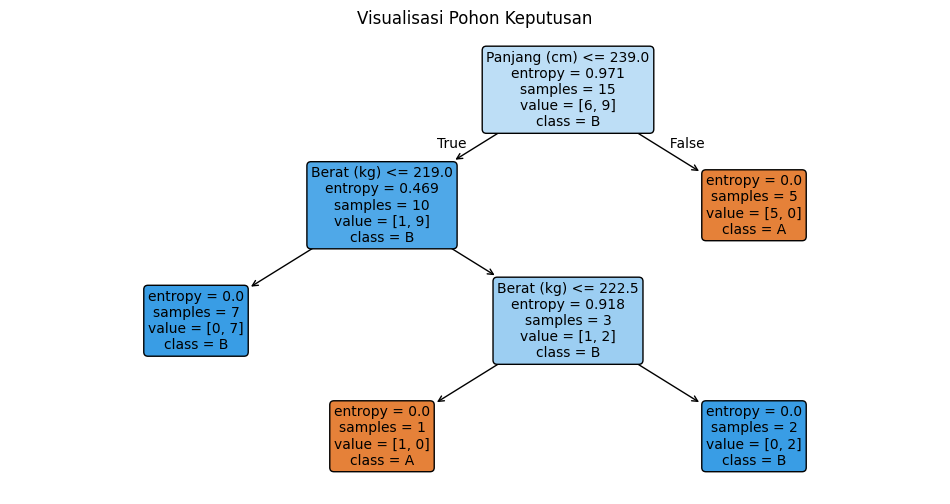

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

# === Data ===
data = {
    "Panjang (cm)": [230, 245, 250, 238, 240, 225, 215, 210, 220, 218, 210, 248, 235, 212, 246],
    "Berat (kg)": [220, 230, 210, 225, 215, 218, 210, 205, 200, 208, 199, 222, 228, 202, 218],
    "Kelas": ['A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A']
}

df = pd.DataFrame(data)

# === Encode label A/B jadi 0/1 ===
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Kelas'])  # A = 0, B = 1

# === Fitur dan Target ===
X = df[["Panjang (cm)", "Berat (kg)"]]
y = df["Label"]

# === Train Decision Tree ===
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X, y)

# === Tampilkan aturan pohon (rules) ===
print("\n=== Aturan Pohon Keputusan ===")
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)

# === Visualisasi Pohon Keputusan ===
plt.figure(figsize=(12, 6))
plot_tree(clf,
          feature_names=["Panjang (cm)", "Berat (kg)"],
          class_names=le.classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Visualisasi Pohon Keputusan")
plt.show()


## Visualisasi Splitting Setelah ada 2 Data Baru

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


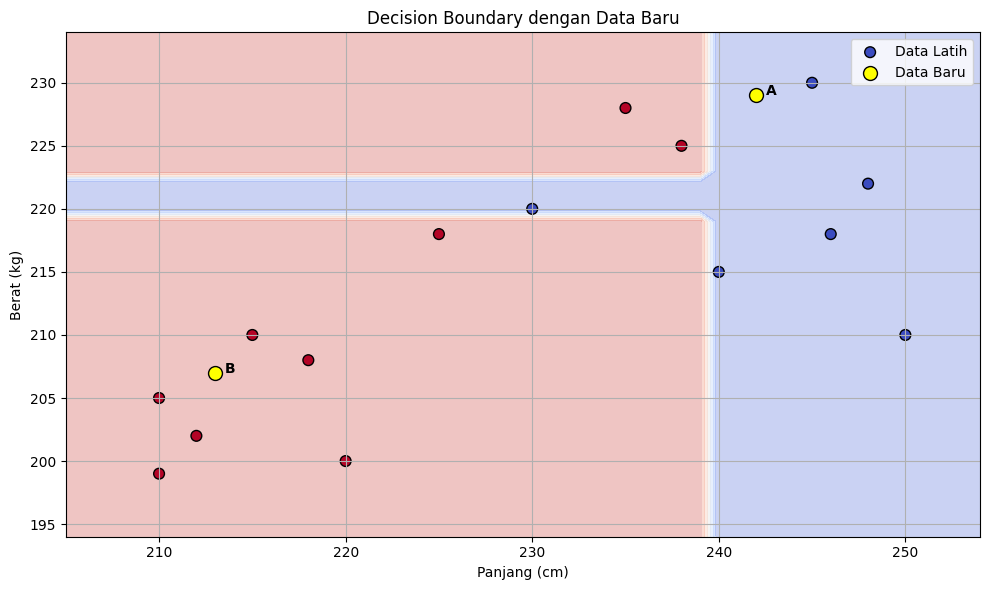

(None, array(['A', 'B'], dtype=object))

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder

# === Data ===
data = {
    "Panjang (cm)": [230, 245, 250, 238, 240, 225, 215, 210, 220, 218, 210, 248, 235, 212, 246],
    "Berat (kg)": [220, 230, 210, 225, 215, 218, 210, 205, 200, 208, 199, 222, 228, 202, 218],
    "Kelas": ['A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'A', 'B', 'B', 'A']
}

df = pd.DataFrame(data)

# === Encode label A/B jadi 0/1 ===
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Kelas'])

# === Fitur dan Target ===
X = df[["Panjang (cm)", "Berat (kg)"]]
y = df["Label"]

# === Train Decision Tree ===
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X, y)

# === Prediksi 2 Data Baru ===
new_data = pd.DataFrame({
    "Panjang (cm)": [242, 213],
    "Berat (kg)": [229, 207]
})
preds = clf.predict(new_data)
predicted_labels = le.inverse_transform(preds)

# === Visualisasi Decision Boundary ===
x_min, x_max = X["Panjang (cm)"].min() - 5, X["Panjang (cm)"].max() + 5
y_min, y_max = X["Berat (kg)"].min() - 5, X["Berat (kg)"].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X["Panjang (cm)"], X["Berat (kg)"], c=y, cmap=plt.cm.coolwarm, edgecolor="k", s=60, label="Data Latih")
plt.scatter(new_data["Panjang (cm)"], new_data["Berat (kg)"], c="yellow", edgecolor="black", s=100, label="Data Baru")
for i, label in enumerate(predicted_labels):
    plt.text(new_data.iloc[i, 0]+0.5, new_data.iloc[i, 1], label, fontsize=10, weight='bold')

plt.xlabel("Panjang (cm)")
plt.ylabel("Berat (kg)")
plt.title("Decision Boundary dengan Data Baru")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show(), predicted_labels
